##Project - Customer Churn Rate Prediction

In [ ]:
#importing Libraries and Dataset
import pandas as pd
import seaborn as sns
from google.colab import files
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt

files=files.upload()
df=pd.read_csv('churn.csv',index_col=0)

df.head(10)

Saving churn.csv to churn (2).csv


,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1
5,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,0
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,...,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,0
7,42,M,4UJ1551,NaN,No Membership,2016-07-12,?,CID56614,Credit/Debit Card Offers,Both,...,429.11,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,...,191.07,18362.31,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,97.31,19244.16,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1


### Data Description

In [ ]:
df.describe(include='all')

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
count,36992.000000,36992,36992,31564,36992,36992,36992,36992,36704,36992,...,36992.000000,36992.000000,36992,33549.000000,36992,36992,36992,36992,36992,36992.000000
unique,NaN,3,36992,3,6,1096,3,11359,3,4,...,NaN,NaN,1654,NaN,2,2,2,5,9,NaN
top,NaN,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,...,NaN,NaN,Error,NaN,Yes,Yes,No,Not Applicable,Poor Product Quality,NaN
freq,NaN,18490,1,14128,7724,55,15839,17846,12349,13913,...,NaN,NaN,3522,NaN,20342,20440,18602,18602,6350,NaN
mean,37.118161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,243.472334,29271.194003,NaN,686.882199,NaN,NaN,NaN,NaN,NaN,0.540982
std,15.867412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,398.289149,19444.806226,NaN,194.063624,NaN,NaN,NaN,NaN,NaN,0.498324
min,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2814.109110,800.460000,NaN,-760.661236,NaN,NaN,NaN,NaN,NaN,0.000000
25%,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.102500,14177.540000,NaN,616.150000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.765000,27554.485000,NaN,697.620000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,356.515000,40855.110000,NaN,763.950000,NaN,NaN,NaN,NaN,NaN,1.000000


In [ ]:
# Checking nulls in the data
df.isna().sum()*100/len(df)

age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
referral_id                      0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0.000000
dtype: float64

In [ ]:
df['security_no'].duplicated().value_counts()

False    36992
Name: security_no, dtype: int64

In [ ]:
df['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

### Data Pre-processing

In [ ]:
# Replacing values in the data

df['gender']=df['gender'].replace('Unknown',np.NaN)
df['medium_of_operation']=df['medium_of_operation'].replace('?',np.NaN)
df['days_since_last_login']=df['days_since_last_login'].replace(-999,np.NaN)
df['avg_time_spent']=df['avg_time_spent'].apply(lambda x:x if x>0 else np.NaN)
df['points_in_wallet']=df['points_in_wallet'].apply(lambda x:x if x>0 else np.NaN)

In [ ]:
joined_through_referral=pd.Series([])
for i in range (0,len(df)):
  if df.iloc[i]['referral_id']=='xxxxxxxx':
    joined_through_referral[i]=0
  else :
    joined_through_referral[i]=1
df['joined_through_referral']=joined_through_referral
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,0,xxxxxxxx,Gift Vouchers/Coupons,NaN,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,1,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,1,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,1,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,0,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [ ]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].replace('Error',np.NaN)
df['avg_frequency_login_days']=df['avg_frequency_login_days'].astype('float')
df['avg_frequency_login_days']=df['avg_frequency_login_days'].apply(lambda x:x if x>0 else np.nan)
missing_values=pd.DataFrame({'Percent Null':df.isnull().sum()*100/len(df)})
missing_values.sort_values('Percent Null',ascending=False)

,Percent Null
region_category,14.673443
medium_of_operation,14.578828
avg_frequency_login_days,11.367323
points_in_wallet,9.675065
days_since_last_login,5.403871
avg_time_spent,4.646951
preferred_offer_types,0.778547
gender,0.159494
age,0.000000
feedback,0.000000


In [ ]:
#Checking skewness in the dataset
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                        -0.007319
joined_through_referral    -0.070332
days_since_last_login       0.028519
avg_time_spent              2.250598
avg_transaction_value       1.011027
avg_frequency_login_days    0.637378
points_in_wallet            0.278675
churn_risk_score           -0.164487
dtype: float64

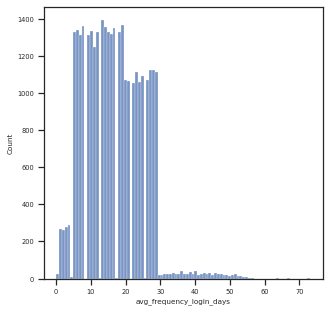

In [ ]:
sns.histplot(df['avg_frequency_login_days'])

In [ ]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].median())
missing_values=pd.DataFrame({'Percent Null':df.isnull().sum()*100/len(df)})
missing_values.sort_values('Percent Null',ascending=False)

,Percent Null
region_category,14.673443
medium_of_operation,14.578828
points_in_wallet,9.675065
days_since_last_login,5.403871
avg_time_spent,4.646951
preferred_offer_types,0.778547
gender,0.159494
age,0.000000
avg_frequency_login_days,0.000000
feedback,0.000000


#### Handling mising values

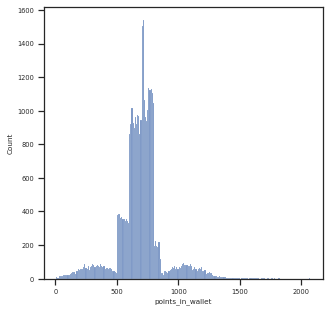

In [ ]:
# Handling missing values
df['region_category']=df['region_category'].fillna('other_region')
df['medium_of_operation']=df['medium_of_operation'].fillna('other_mop')
sns.histplot(df['points_in_wallet'])

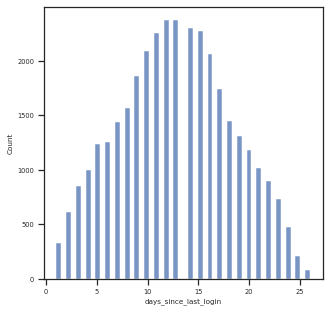

In [ ]:
df['points_in_wallet']=df['points_in_wallet'].fillna(df['points_in_wallet'].mean())
sns.histplot(df['days_since_last_login'])

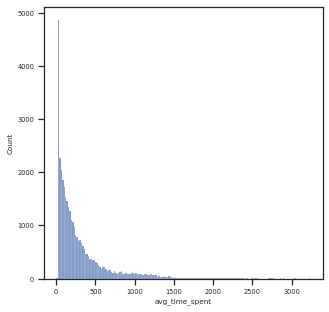

In [ ]:
df['days_since_last_login']=df['days_since_last_login'].fillna(df['days_since_last_login'].mean())
sns.histplot(df['avg_time_spent'])

In [ ]:
df['avg_time_spent']=df['avg_time_spent'].fillna(df['avg_time_spent'].median())
df['preferred_offer_types']=df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
missing_values=pd.DataFrame({'Percent Null':df.isnull().sum()*100/len(df)})
missing_values.sort_values('Percent Null',ascending=False)

,Percent Null
age,0.0
days_since_last_login,0.0
feedback,0.0
complaint_status,0.0
past_complaint,0.0
offer_application_preference,0.0
used_special_discount,0.0
points_in_wallet,0.0
avg_frequency_login_days,0.0
avg_transaction_value,0.0


#### Data Encoding

In [ ]:
df['feedback'].value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [ ]:
df['past_complaint'].replace(['Yes','No'],[1,0],inplace=True)
df['used_special_discount'].replace(['Yes','No'],[1,0],inplace=True)
df['joined_through_referral'].replace(['Yes','No'],[1,0],inplace=True)
df['offer_application_preference'].replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
def convert_membership_category(x):
  if x=='No Membership':
    return 0
  elif x=='Basic Membership':
    return 1
  elif x=='Silver Membership':
    return 2
  elif x=='Gold Membership':
    return 3
  elif x=='Platinum Membership':
    return 4
  elif x=='Premium Membership':
    return 5
df['membership_category']=df['membership_category'].apply(lambda z:convert_membership_category(z))
df

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,4,2017-08-17,0,xxxxxxxx,Gift Vouchers/Coupons,other_mop,...,300.63,53005.25,17.0,781.750000,1,1,0,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,5,2017-08-28,1,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,690.354685,1,0,1,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,0,2016-11-11,1,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.690000,0,1,1,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,0,2016-10-29,1,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.660000,0,1,1,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,0,2017-09-12,0,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.060000,0,1,1,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,6F51HFO,other_region,1,2017-09-21,0,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,174.18,27277.68,6.0,639.510000,0,1,1,No Information Available,No reason specified,1
36988,29,F,21KSM8Y,Town,1,2016-06-27,0,xxxxxxxx,Without Offers,Smartphone,...,174.18,11069.71,28.0,527.990000,1,0,0,Not Applicable,Poor Customer Service,1
36989,23,F,XK1IM9H,other_region,1,2016-09-11,1,CID3838,Gift Vouchers/Coupons,Desktop,...,154.94,38127.56,16.0,680.470000,0,1,1,Unsolved,Poor Website,1
36990,53,M,K6VTP1Z,Village,4,2017-06-15,0,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,...,482.61,2378.86,20.0,197.264414,1,1,0,Not Applicable,No reason specified,0


In [ ]:
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [ ]:
#Removing not required columns
df.drop(['security_no','referral_id'],axis=1,inplace=True)
df['days_since_last_login']=df['days_since_last_login'].round()

In [ ]:
#Converting Date columns into required fields 


df['joining_date']=pd.to_datetime(df['joining_date'],format='%Y-%m-%d')

df['today']=date(2022,6,2)
df[['joining_date', 'today']]=df[['joining_date', 'today']].apply(pd.to_datetime)
df['days_joined']=(df['today']-df['joining_date']).dt.days
df['hour_of_the_day']=pd.DatetimeIndex(df['last_visit_time']).hour

df.drop(['joining_date','last_visit_time','today'],axis=1,inplace=True)
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_joined,hour_of_the_day
0,18,F,Village,4,0,Gift Vouchers/Coupons,other_mop,Wi-Fi,17.0,300.63,...,17.0,781.750000,1,1,0,Not Applicable,Products always in Stock,0,1750,16
1,32,F,City,5,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,...,10.0,690.354685,1,0,1,Solved,Quality Customer Care,0,1739,12
2,44,F,Town,0,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,...,22.0,500.690000,0,1,1,Solved in Follow-up,Poor Website,1,2029,22
3,37,M,City,0,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,...,6.0,567.660000,0,1,1,Unsolved,Poor Website,1,2042,15
4,31,F,City,0,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,...,16.0,663.060000,0,1,1,Solved,Poor Website,1,1724,15


### Data Visualization

In [ ]:
#Correlation heatmap

corr_matrix = df.corr()
print(corr_matrix["churn_risk_score"].sort_values(ascending=False))

churn_risk_score                1.000000
avg_frequency_login_days        0.136550
joined_through_referral         0.034237
days_since_last_login           0.016382
past_complaint                  0.008934
age                             0.006124
hour_of_the_day                -0.005821
days_joined                    -0.009913
used_special_discount          -0.010648
avg_time_spent                 -0.012481
offer_application_preference   -0.018729
avg_transaction_value          -0.218012
points_in_wallet               -0.299658
membership_category            -0.751655
Name: churn_risk_score, dtype: float64


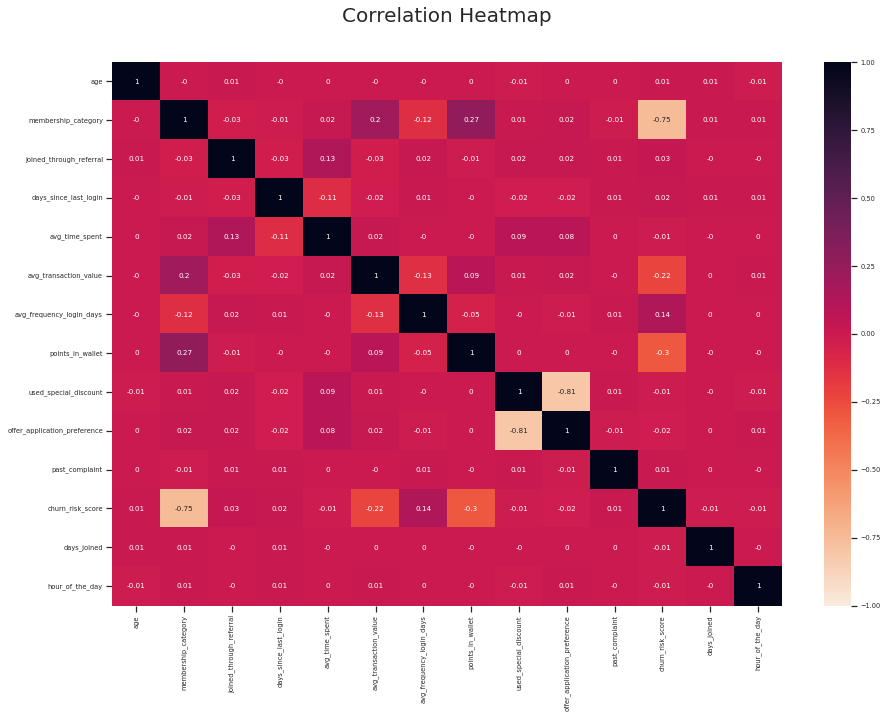

In [ ]:
plt.figure(figsize=(15, 10))
cmap = sns.cm.rocket_r
heatmap = sns.heatmap(round(df.corr(), 2), vmin=-1, vmax=1, annot=True , cmap = cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=40);

#### EDA

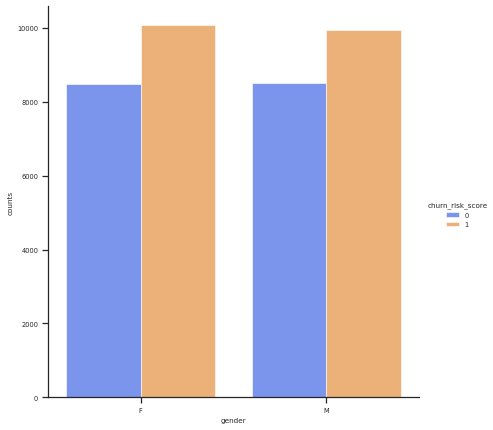

In [ ]:
df_gender = df.groupby(['churn_risk_score', 'gender']).size().reset_index(name='counts')
sns.catplot(
    data=df_gender, kind="bar",
    x="gender", y="counts", hue="churn_risk_score",
    ci="sd", palette="bright", alpha=.6, height=6)

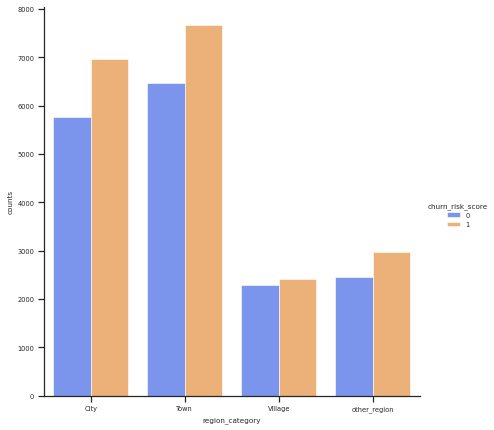

In [ ]:
df_region = df.groupby(['churn_risk_score', 'region_category']).size().reset_index(name='counts')
sns.catplot(
    data=df_region, kind="bar",
    x="region_category", y="counts", hue="churn_risk_score",
    ci="sd", palette="bright", alpha=.6, height=6)

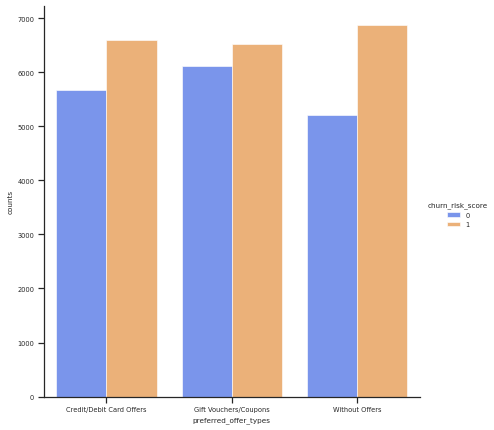

In [ ]:
df_offer = df.groupby(['churn_risk_score', 'preferred_offer_types']).size().reset_index(name='counts')
sns.catplot(
    data=df_offer, kind="bar",
    x="preferred_offer_types", y="counts", hue="churn_risk_score",
    ci="sd", palette="bright", alpha=.6, height=6)

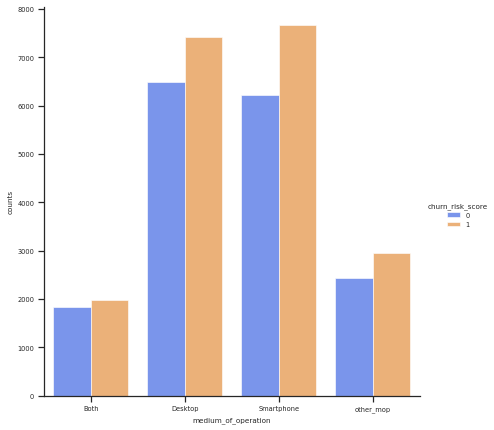

In [ ]:
df_medium = df.groupby(['churn_risk_score', 'medium_of_operation']).size().reset_index(name='counts')
sns.catplot(
    data=df_medium, kind="bar",
    x="medium_of_operation", y="counts", hue="churn_risk_score",
    ci="sd", palette="bright", alpha=.6, height=6)

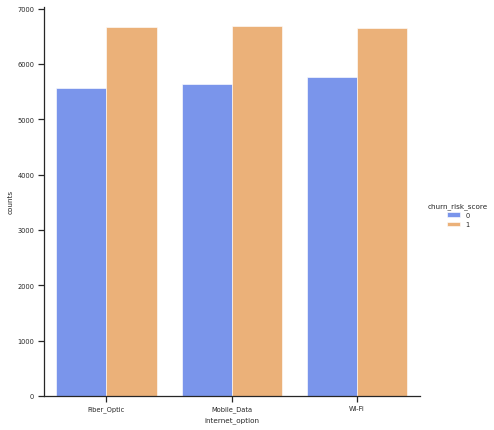

In [ ]:
df_internet = df.groupby(['churn_risk_score', 'internet_option']).size().reset_index(name='counts')
sns.catplot(
    data=df_internet, kind="bar",
    x="internet_option", y="counts", hue="churn_risk_score",
    ci="sd", palette="bright", alpha=.6, height=6)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

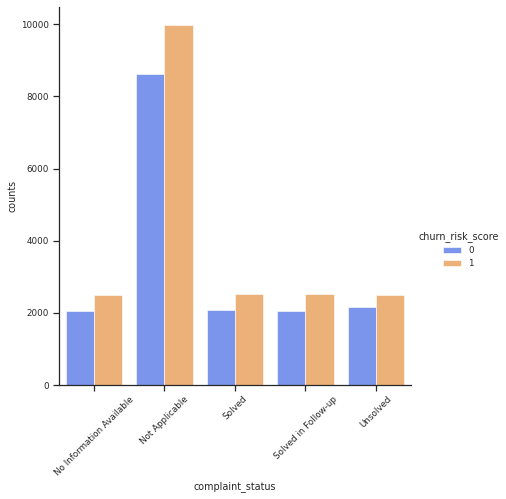

In [ ]:
df_complaint = df.groupby(['churn_risk_score', 'complaint_status']).size().reset_index(name='counts')
sns.set_theme(style="ticks", font_scale=0.8)
sns.catplot(
    data=df_complaint, kind="bar",
    x="complaint_status", y="counts", hue="churn_risk_score",
    ci="sd", palette="bright", alpha=.6, height=6)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

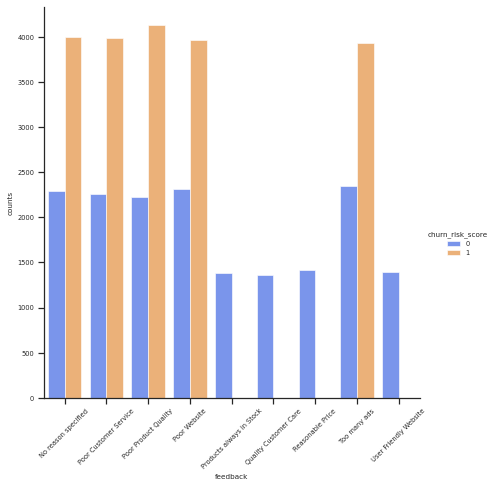

In [ ]:
df_feedback = df.groupby(['churn_risk_score', 'feedback']).size().reset_index(name='counts')
sns.set_theme(style="ticks", font_scale=0.6)
sns.catplot(
    data=df_feedback, kind="bar",
    x="feedback", y="counts", hue="churn_risk_score",
    ci="sd", palette="bright", alpha=.6, height=6)
plt.xticks(rotation=45)

#### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['gender']])
df[ohe.categories_[0]] = transformed.toarray()
df.drop('gender',axis=1,inplace=True)
def onehot(x):
  transformed = ohe.fit_transform(df[[str(x)]])
  df[ohe.categories_[0]] = transformed.toarray()
objects=list(df.dtypes[df.dtypes=='object'].index)
rm=['joining_date','last_visit_time']
objects = [ele for ele in objects if ele not in rm]
objects
for i in objects:
  onehot(i)
df.drop(objects,axis=1,inplace=True)
df.rename({'F':'Female','M':'Male'},axis=1,inplace=True)
df.drop('used_special_discount',axis=1,inplace=True)
df.columns

Index(['age', 'membership_category', 'joined_through_referral',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'churn_risk_score',
       'days_joined', 'hour_of_the_day', 'Female', 'Male', 'City', 'Town',
       'Village', 'other_region', 'Credit/Debit Card Offers',
       'Gift Vouchers/Coupons', 'Without Offers', 'Both', 'Desktop',
       'Smartphone', 'other_mop', 'Fiber_Optic', 'Mobile_Data', 'Wi-Fi',
       'No Information Available', 'Not Applicable', 'Solved',
       'Solved in Follow-up', 'Unsolved', 'No reason specified',
       'Poor Customer Service', 'Poor Product Quality', 'Poor Website',
       'Products always in Stock', 'Quality Customer Care', 'Reasonable Price',
       'Too many ads', 'User Friendly Website'],
      dtype='object')

### Feature Selection

In [ ]:
independent_variables=df.columns.values.tolist()

independent_variables.remove('churn_risk_score')

independent_variables

X=df[independent_variables].values

X

array([[18.,  4.,  0., ...,  0.,  0.,  0.],
       [32.,  5.,  1., ...,  0.,  0.,  0.],
       [44.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [23.,  1.,  1., ...,  0.,  0.,  0.],
       [53.,  4.,  0., ...,  0.,  0.,  0.],
       [35.,  2.,  0., ...,  0.,  0.,  0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scale= StandardScaler()
X = scale.fit_transform(X)
pca=PCA()
principalComponents = pca.fit_transform(X)
z_values = pd.DataFrame(data = principalComponents)


z_values.loc['Explained Variance']=pca.explained_variance_
z_values.loc['Proportion Variance']=pca.explained_variance_ratio_
z_values.loc['Cumulative Proportion of Variance']=np.cumsum(pca.explained_variance_ratio_)


z_values.columns=[x for x in range(1,44)]
cum_var = z_values.loc['Cumulative Proportion of Variance']
cum_var

1     0.059957
2     0.107615
3     0.154141
4     0.196338
5     0.233598
6     0.270295
7     0.305551
8     0.340428
9     0.375239
10    0.409783
11    0.443782
12    0.473448
13    0.501926
14    0.529985
15    0.558021
16    0.586053
17    0.613992
18    0.640941
19    0.667507
20    0.694006
21    0.720420
22    0.744701
23    0.768931
24    0.793082
25    0.816829
26    0.840317
27    0.863515
28    0.886422
29    0.908925
30    0.931213
31    0.951645
32    0.969127
33    0.985490
34    0.996157
35    1.000000
36    1.000000
37    1.000000
38    1.000000
39    1.000000
40    1.000000
41    1.000000
42    1.000000
43    1.000000
Name: Cumulative Proportion of Variance, dtype: float64

Looking at the variance score, we can say that PCA is not good for this dataset as the variables are already independent

#### Standardizing the dataset

In [ ]:
from sklearn.model_selection import train_test_split

features=df.iloc[:,df.columns!='churn_risk_score']
target=df['churn_risk_score']


X_train, X_test, y_train, y_test = train_test_split(features, target , test_size=0.25, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(27744, 43)
(9248, 43)


### Model Exploration

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

lr_accuracy=pd.Series(metrics.accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.81      0.83      4240
           1       0.85      0.89      0.87      5008

    accuracy                           0.85      9248
   macro avg       0.85      0.85      0.85      9248
weighted avg       0.85      0.85      0.85      9248

[[3445  795]
 [ 569 4439]]


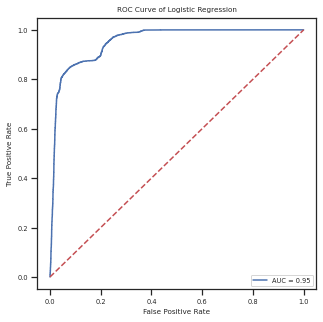

In [ ]:
y_scores = lr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()


#### KNN

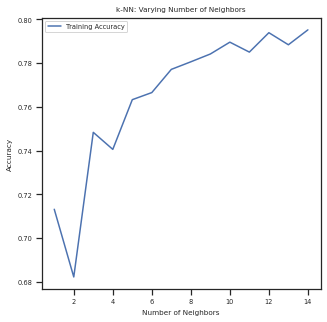

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

no_neighbors = np.arange(1, 15)
validate_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the testing set
    validate_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, validate_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
y_scores=knn.get_params()
knn_accuracy=metrics.accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

[[2667 1573]
 [ 423 4585]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      4240
           1       0.74      0.92      0.82      5008

    accuracy                           0.78      9248
   macro avg       0.80      0.77      0.77      9248
weighted avg       0.80      0.78      0.78      9248



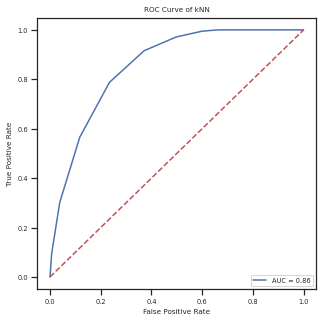

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_pred,y_test))
nb_accuracy=metrics.accuracy_score(y_test,y_pred)

[[1378 2862]
 [   0 5008]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.49      1378
           1       1.00      0.64      0.78      7870

    accuracy                           0.69      9248
   macro avg       0.66      0.82      0.63      9248
weighted avg       0.90      0.69      0.73      9248



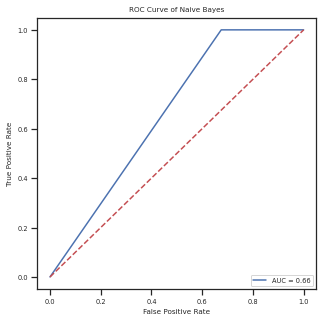

In [ ]:
y_scores = gnb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes')
plt.show()

#### Decision Tree

In [ ]:
from sklearn import tree

dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_pred,y_test))
print(metrics.confusion_matrix(y_pred,y_test))
dt_accuracy=metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4279
           1       0.91      0.92      0.92      4969

    accuracy                           0.91      9248
   macro avg       0.91      0.91      0.91      9248
weighted avg       0.91      0.91      0.91      9248

[[3842  437]
 [ 398 4571]]


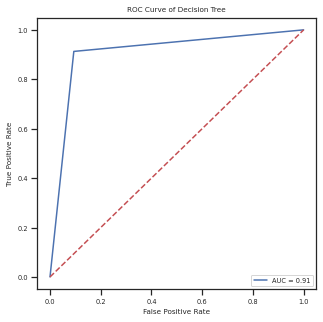

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

#### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(44), random_state=1)
nn.fit(X_train,y_train)
y_pred=nn.predict(X_test)
print(classification_report(y_pred,y_test))
print(metrics.confusion_matrix(y_pred,y_test))
nn_accuracy=metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4046
           1       0.94      0.91      0.92      5202

    accuracy                           0.92      9248
   macro avg       0.91      0.92      0.91      9248
weighted avg       0.92      0.92      0.92      9248

[[3754  292]
 [ 486 4716]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


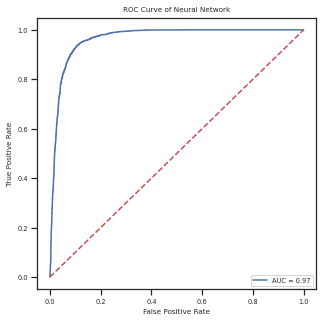

In [ ]:
y_scores = nn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Neural Network')
plt.show()


### Performance Evaluation

In [ ]:
total_accuracy=pd.DataFrame()
total_accuracy['Logistic Regression']=lr_accuracy
total_accuracy['KNN']=knn_accuracy
total_accuracy['Naive Bayes']=nb_accuracy
total_accuracy['Decision Tree']=dt_accuracy
total_accuracy['Neural Network']=nn_accuracy
total_accuracy

,Logistic Regression,KNN,Naive Bayes,Decision Tree,Neural Network
0,0.852509,0.78417,0.690528,0.90971,0.915874


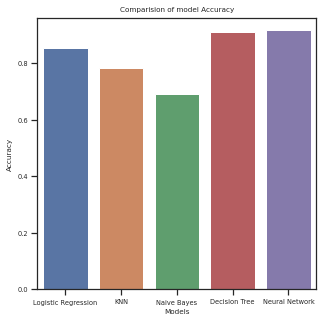

In [ ]:
import seaborn as sns
sns.barplot(data=total_accuracy).set(title='Comparision of model Accuracy')
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = (5,5)

Looking at the accuracy and sensitivity of the models and also considering the use case of our project, we can say that the Neural betworks will be the best model and we will be going further with this.